## Regression Model

### 1. Abalone Dataset

- Sex	Feature	Categorical	M, F, and I (infant)		
- Length	Feature	Continuous	Longest shell measurement	mm	
- Diameter	Feature	Continuous	perpendicular to length	mm	
- Height	Feature	Continuous	with meat in shell	mm	
- Whole_weight	Feature	Continuous	whole abalone	grams	
- Shucked_weight	Feature	Continuous	weight of meat	grams	
- Viscera_weight	Feature	Continuous	gut weight (after bleeding)	grams	
- Shell_weight	Feature	Continuous	after being dried	grams	
- Rings	Target	Integer	+1.5 gives the age in years		

In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
abalone = fetch_ucirepo(id=1) 

In [2]:
# #Read the original dataset into a pandas dataframe
df = abalone.data.original
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
df = df.drop('Sex', axis = 1) # we will be working with numerical data values
df

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [5]:
df['Age'] = df['Rings'] + 1.5 # adding 1.5 to the rings gives the age of the abalone, our target variable
df = df.drop('Rings', axis = 1) # drop the "Rings" columns

### 2. How does Principal Component Analysis (PCA) affect the results of Normal Linear Regression?

#### 2.1 Normal Linear Regression

In this example, we would like to predict the age of the abalone based on the other variables in the dataset by using Linear Regression. 

In mathematical notation, this means
$$y = \beta_{0} + \beta_{1} X_{1} + \beta_{2} X_{2} + ... + \beta_{k} X_{k} + u$$
- $y$ represents the age of the abalone
- $X_{j}$'s represent the other variables such as length, diameter, height,...,shell_weight
- $u$ represent the error term

In Linear Regression, the estimators $\hat{\beta_{0}} , \hat{\beta_{1}} , ... , \hat{\beta_{k}}$ are most commonly estimated using Ordinary Least Square method, which requires to satisfy the Classical Linear Model assumptions: 

- 1. Linearity in Parameters: The model should be linear in the parameters
- 2. Random Sampling: The data must be randomly sampled from the population
- 3. No Perfect Multicollinearity: There should be no perfect correlation between any pairs of regressors
- 4. Zero Condition Mean: $E(u_{i}|X_{i1}, X_{i2}, ... , X_{ik}) = 0$
- 5. Homoscedasticity: $Var(u_{i}| X_{i1}, X_{i2}, ... , X_{ik}) = \sigma^2$
- 6. Normality: $u_{i}$ follows a normal distribution, together with assumption 4 and 5, $u_{i} \sim N(0, \sigma^2)$

Note: Features and Regressors are used interchangeably in the explanation

In [6]:
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

# Split them into features/regressors/independent variables (X) and target/dependent variable (y)
y = df['Age'] 
X = df[['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight']]

# Normalise the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert the scaled data back to DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)

# Add a constant column to X_train for the intercept, note that statsmodels default setting assuming no intercept
X_scaled_const = sm.add_constant(X_scaled_df)

# Fit the model using statsmodels
model_lr = sm.OLS(y, X_scaled_const).fit()

print(model_lr.summary())


                            OLS Regression Results                            
Dep. Variable:                    Age   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     665.2
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        14:01:51   Log-Likelihood:                -9250.0
No. Observations:                4177   AIC:                         1.852e+04
Df Residuals:                    4169   BIC:                         1.857e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             11.4337      0.034    333.

The $t$-test performed is to check if there is a significant relationship between the regressor $X_{j}$ and the dependent variable $y$

**Hypothesis Test**:

$$ H_{0} : \beta_{j} = 0 $$ 

$$H_{1} : \beta_{j} \neq 0$$

**Test Statistic**:

Under $H_{0}$, given the Classical Linear Model Assumptions, the test $t$-statistics is as follow:

$$t = \frac{\hat{\beta}_{j}}{se(\hat{\beta}_{j})} \sim t_{n-k-1}$$

where $n$ represent the sample size and $k$ represent the number of regressors.

**Decision Rule**:

If the $p$-value < 0.05, we reject $H_{0}$ and conclude that there is a significant relationship between the regressor $j$ and the dependent variable $y$, ceteris paribus.

In this particular case, regressor 'Length' has failed to reject $H_{0}$, and hence we can consider dropping 'Length' variable in our regression model and make our model simpler without sacrificing predictive accuracy.


#### 2.2 Multicollinearity issues

However, it is possible for us to wrongly removed 'Length', especially if there is a multicollinearity issue present in the model. Multicollinearity occurs when two or more regrssors are highly correlated, which can cause issues with estimating the coefficient reliably. 

Multicollinearity may also cause the model to assign inflated standard errors to the coefficients, which could potentially lead to incorrect conclusions about the importance of a given regressor.

Referring to the correlation table, we can see 'Length' the not only the only regressor that is highly correlated with other regressors.

<Axes: >

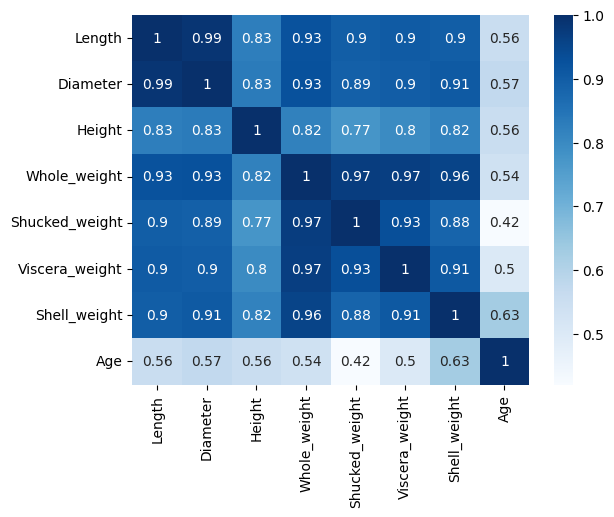

In [7]:
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, cmap = "Blues", annot = True)

#### 2.3 Principal Component Analysis

To mitigate the multicollinearity issue, we will make use of Principal Component Analysis (PCA). 

To explain the relationship in Statistics, we can gather valuable insight by analyzing the variance. PCA will first find (normalised) linear combination of the regressors $X_{1}, X_{2}, .. X_{k}$ or in simpler term, the "direction" (i.e. our new "axis"), that captures the highest variance, denoted as $Z_{1}$. 

Then it will find the next orthogonal (perpendicular) "direction" $Z_{2}$ that captures the 2nd highest variance. It will repeat this process all the way to $Z_{k}$, to form a new orthogonal basis $\{Z_{1}, Z_{2}, ... , Z_{k}\}$ instead of the standard basis $\{X_{1}, X_{2}, ... X_{k}\}$.

In mathematical notation: $Z_{m} = \phi_{m1}X_{1} + \phi_{m2}X_{2} + ... + \phi_{mk}X_{k}$, $ 1 \leq m \leq k$. These $Z_{m}$ are also known as the principal component (PC).

One of main advantage using the new PC basis over the standard basis is that $Z_{1}, Z_{2}, ... , Z_{k}$ are uncorrelated to one another. By transforming the data into uncorrelated PCs, PCA eliminates the multicollinearity issue.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# Split them into features/regressors/independent variables (X) and target/dependent variable (y)
y = df['Age'] 
X = df[['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight']]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Normalise the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Perform PCA
pca = PCA(n_components = 7) # since they are 7 features in the dataset
X_train_pca = pca.fit_transform(X_train_scaled)

# Applying the same PCA transformation to the test set
X_test_pca = pca.transform(X_test_scaled)

# Display all the principal components, these are the new orthogornal basis {Z1, Z2, ... , Z7} we work with
pc_df = pd.DataFrame(pca.components_, columns=X.columns, index=[f"PC{i+1}" for i in range(pca.n_components_)])

pc_df

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
PC1,0.383796,0.384060,0.344101,0.391394,0.379360,0.382187,0.378976
PC2,-0.011318,0.013955,0.897575,-0.211043,-0.307729,-0.224945,-0.064806
PC3,0.592649,0.590254,-0.235893,-0.252298,-0.264486,-0.287176,-0.169248
PC4,-0.088986,-0.008514,-0.139484,0.050590,-0.484095,-0.179461,0.838713
PC5,0.029356,0.009060,-0.027761,-0.114792,-0.561069,0.805611,-0.145950
PC6,-0.701476,0.709631,-0.009006,0.019999,0.015102,0.020338,-0.056858
PC7,0.022142,-0.013148,-0.000845,0.849989,-0.376911,-0.198076,-0.309126


In many case, we only need the top few PCs $Z_{1}, Z_{2}$ or occasionally $Z_{3}$. There are few main reasons why.

First, the first few PCs is sufficient enough to explain majority of the variance in the dataset, capturing the most important patterns and relationship. Consequently, we disregard the remaining components ($Z_{m}$ for $m > 3$) as they contribute very little additional variance in the dataset adding almost no new "information" that would help in explaining the relationship between the dependent variable and the regressors.

Second, visualising data in  4 and higher dimension is extremely difficult. Therefore, focusing on 2 or 3 is usually the most appropriate approach as it allows us to visualise and interpret the patterns better. This process is known as dimensionality reduction.

Variance Ratio explained by PC 1: 0.9052391982481492
Variance Ratio explained by PC 2: 0.042193826771248645
Variance Ratio explained by PC 3: 0.024228960237551812
Variance Ratio explained by PC 4: 0.016623123363727375
Variance Ratio explained by PC 5: 0.00913698721946474
Variance Ratio explained by PC 6: 0.0017484302850244511
Variance Ratio explained by PC 7: 0.0008294738748336328


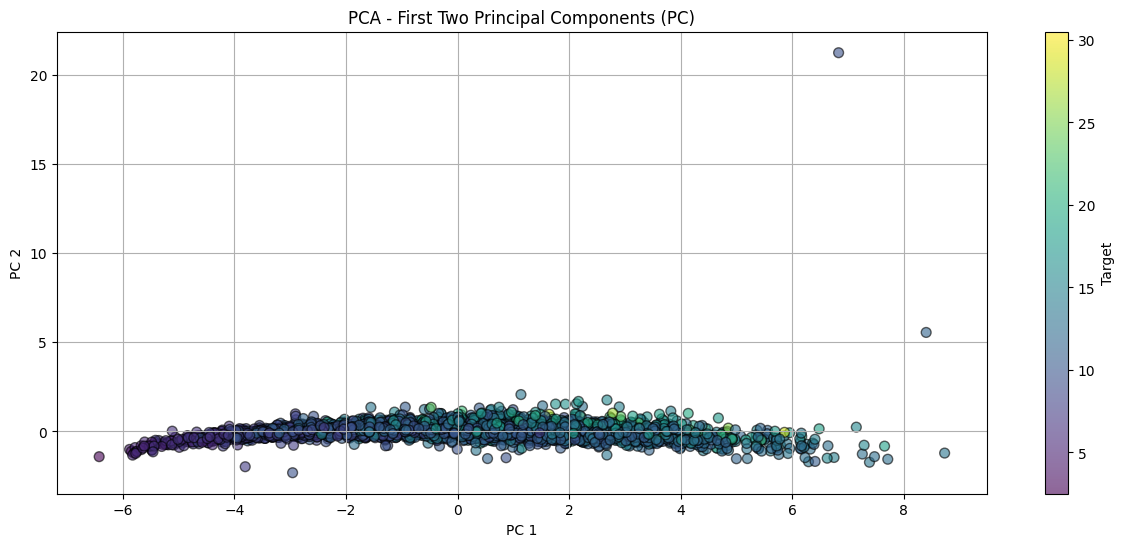

In [9]:
# The variance ratio that is explained by each of the PCs
# From the result, we can see the diminishing return of variance as we add a new principal component. 

for i, num in enumerate(pca.explained_variance_ratio_):
    print(f"Variance Ratio explained by PC {i+1}: {num}")

# About 95% of the variance can already be explained by the first 2 PCs
# so we visualise the datapoints using the first 2 PCs
plt.figure(figsize=(15, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c = y_train, cmap='viridis', alpha=0.6, edgecolor='k', s=50)
plt.title('PCA - First Two Principal Components (PC)')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.colorbar(label='Target')  # Color by the target variable
plt.grid(True)
plt.show()

Afterwards, we regress the dependent variable (y) against the PCs. In mathematical notation, it means

- $y = \alpha_{0} + \alpha_{1}Z_{1} + \alpha_{2}Z_{2} + ... \alpha_{p}Z_{p}$ where $p$ is the number of top few PCs we selected to regress, $1 \leq p \leq k$.

As mentioned in the previous code, we can only just use the top few PCs as they explained majority of the variance of the dataset. This allows our model to be much computationally less expensive, and at the same time retaining almost all of the "information".

In this example, We choose $p = 2$, i.e. the top 2 PCs.

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Perform PCA, but this time we only choose the first 2 PCs
pca = PCA(n_components = 2)
X_train_pca = pca.fit_transform(X_train_scaled)

# Applying the same PCA transformation to the test set
X_test_pca = pca.transform(X_test_scaled)

# Train the linear regression model on the PCA-transformed data 
model_pca = LinearRegression()
model_pca.fit(X_train_pca, y_train)

# Evaluate the model on the transformed data
y_pred_pca = model_pca.predict(X_test_pca)

# Performance Metrics of PCA
r2_pca = r2_score(y_test,y_pred_pca)

print(f'R2 (PCA Features with Top 2 Components): {r2_pca:.4f}')

R2 (PCA Features with Top 2 Components): 0.3839


### 2.4 Comparison between Normal Linear Regression vs PC Regression

**Drop in $R^2$ with PCA transformation**:

Note that the $R^2$ are lower in the model when we regress $y$ against the PCA-transformed data as compared to the model when we regress $y$ against the original data. 
- $R^2$ using Normal Linear Regression: 0.528, 
- $R^2$ using PCA: 0.3839

The drop in $R^2$ when using PCA was because we reduced the number of features, and hence causing a loss of information, in which results in a model that explains less of the variance in the target variable. In other words, the reduced set of PCs might not capture all the variance that the original features did.

**Dimensionality Reduction vs Model Accuracy**

However, the primary purpose of PCA is dimensionality reduction. By reducing the number of features, we aim to simplify the model without losing too much information, rather than improving the model accuracy. In this example, even though we reduced the dimension by 5, we still retain roughly 70% ($\frac{0.3839}{0.528} * 100% $) of the variance explained by the original Normal Linear Regression.

PCA is generally more useful when we are dealing with complex dataset that has many number of features. By transforming the original data into a smaller set of uncorrelated principal components, we reduce the complexity of the model and mitigate the risk of overfitting. 

**Feature Significance**

It is important to note that PCA only identifies the PCs or the "axis" that explain the most variance in the data. PCs are linear combinations of the original features, and does not provide a clear indication of which specific feature is most significant.

**Conclusion**

Both methods - Normal Linear Regression & PC Regression have their own pros and cons. Ultimately, the choice between these methods depends on the objective of the analysis and the complexity of the dataset. For smaller datasets or cases where interpretability is key, traditional linear regression is often preferred, while PCA is more useful for tackling high-dimensional data.

In this Abalone dataset, Normal Linear Regression seem to be more preferred, given the simplicity of the data. However, both methods are explored for us to compare and understand their respective strengths.

### 3. Is there evidence of non-linear relationship between the dependent variable (Age) and the independent variables?

#### 3.1 Heteroscedasticity

Heteroscedasticity is another common violation in OLS Linear Regression (Violation of MLR 5) i.e $Var(u_{i}|X_{i1}, X_{i2}, ... , X_{ik}) \neq \sigma^2$

To test for presence in heteroscedasticity, we will conduct the White test. The White test determines if the error terms has any relationship with not only the original regressors, but also all the non-redundant squares and interaction terms of all regressors.

***Step 1 : Find the residual $\hat{u}^2$ obtained after the OLS regression.***

$\hat{u}^2$ = $(y - \hat{y})^2$ where $\hat{y}^2 = \hat{\beta_{0}} + \hat{\beta_{1}}X_{1} + ... + \hat{\beta_{k}}X_{k}$

***Step 2: Obtain the auxiliary regression by regress $\hat{u}^2$ with the following terms:***
1. the regressors $X_{j}$ for all $j$, 
2. the non-redudant squares $X_{j}^2$ for all $j$ and,
3. the possible interaction terms of all regressors ($X_{l}X_{j}$ for all $l \neq j$)

***Step 3: Hypothesis Test***
$H_{0}$ : all the coefficients of the auxiliary regression are 0 (i.e. homoscedasticity)
$H_{1}$ : at least one coefficient of the auxiliary regression is non-zero (i.e. heteroscedasticity)

From the axuiliary regression, obtain the $R^2_{\hat{u}^2}$. Under $H_{0}$, the test statistics is given by:

$LM = nR^2_{\hat{u}^2} \sim \chi^2_{d}$ 

where: $n$ is the number of observations and $d$ is the number of explanatory variables in the auxiliary regression, including the original regressors, squared terms, and interaction terms. $LM$ represents the Langrange Multiplier.

Rejecting $H_{0}$ implies that there is heteroscedasticity in the original regression. Additionally, it suggests a possible non-linear relationship between the dependent variable and the original regressors. This is because the sqaured terms and interaction terms in the auxiliary regression may be capturing non-linear effect or interaction that may influence the variance of the errors.


In [14]:
import statsmodels.stats.api as sms

In [104]:
white_test = sms.het_white(model_lr.resid, model_lr.model.exog)

print("\nWHITE TEST RESULTS:")
print('LM value: ', round(white_test[0],4))
print('p-value: ', round(white_test[1],4))


WHITE TEST RESULTS:
LM value:  742.5092
p-value:  0.0


#### 3.2 Log-Log Model 

A log-log model is useful to capture non-linear relationship between the dependent and independent variables as it transforms the relationship into a form where non-linear patterns can be represented as linear relationships

$\log(Y) = \beta_{0} + \beta_{1}\log(X_{1}) + ... + \beta_{k}\log(X_{k}) + u$

In [98]:
df_2 = np.log(df)
df_2 = df_2.add_prefix('log_')
df_2

c:\Users\andyl\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


,log_Length,log_Diameter,log_Height,log_Whole_weight,log_Shucked_weight,log_Viscera_weight,log_Shell_weight,log_Age
0,-0.787458,-1.007858,-2.353878,-0.665532,-1.493880,-2.292635,-1.897120,2.803360
1,-1.049822,-1.328025,-2.407946,-1.489435,-2.307598,-3.026191,-2.659260,2.140066
2,-0.634878,-0.867501,-2.002481,-0.390084,-1.360627,-1.955456,-1.560648,2.351375
3,-0.820981,-1.007858,-2.079442,-0.661649,-1.534794,-2.171557,-1.864330,2.442347
4,-1.108663,-1.366492,-2.525729,-1.584745,-2.413517,-3.231455,-2.900422,2.140066
...,...,...,...,...,...,...,...,...
4172,-0.570930,-0.798508,-1.801810,-0.119910,-0.994252,-1.431292,-1.390302,2.525729
4173,-0.527633,-0.820981,-2.002481,-0.034591,-0.823256,-1.539446,-1.345152,2.442347
4174,-0.510826,-0.744440,-1.584745,0.162119,-0.643405,-1.246532,-1.177655,2.351375
4175,-0.470004,-0.723606,-1.897120,0.090298,-0.632993,-1.343235,-1.217396,2.442347


In [99]:
print("\nMinimum value for each column: ")
print(df_2.min())

print("\nMaximum value for each column: ")
print(df_2.max())


Minimum value for each column: 
log_Length           -2.590267
log_Diameter         -2.900422
log_Height                -inf
log_Whole_weight     -6.214608
log_Shucked_weight   -6.907755
log_Viscera_weight   -7.600902
log_Shell_weight     -6.502290
log_Age               0.916291
dtype: float64

Maximum value for each column: 
log_Length           -0.204567
log_Diameter         -0.430783
log_Height            0.122218
log_Whole_weight      1.038685
log_Shucked_weight    0.397433
log_Viscera_weight   -0.274437
log_Shell_weight      0.004988
log_Age               3.417727
dtype: float64


In [100]:
df_2 = df_2[df_2['log_Height'] != -np.inf] # drop the one with infinity value as it will cause issue in our analysis
df_2 = df_2.reset_index()

In [101]:
# Split them into features/regressors/independent variables (X) and target/dependent variable (y)
y = df_2['log_Age'] 
X = df_2[['log_Length', 'log_Diameter', 'log_Height', 'log_Whole_weight', 'log_Shucked_weight', 'log_Viscera_weight', 'log_Shell_weight']]

# Normalise the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert the scaled data back to DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)

# Add a constant column to X_train for the intercept, note that statsmodels default setting assuming no intercept
X_scaled_const = sm.add_constant(X_scaled_df)

# Fit the model using statsmodels
model_lr_2 = sm.OLS(y, X_scaled_const).fit()

print(model_lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                log_Age   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     999.3
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        16:57:25   Log-Likelihood:                 1560.2
No. Observations:                4175   AIC:                            -3104.
Df Residuals:                    4167   BIC:                            -3054.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.3994      0

#### 3.3 Comparision between Normal Linear Regression vs Log-Log Linear Regression Model

Notice that the $R^2$ has increased to 0.627 when we are using the log-log model. This suggests that the log-log transformation has improved the fit of the model, potentially capturing a more accurate relationship. This improvement typically implies that the relationship between the variables may potentially be non-linear in nature.